In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence 
from matplotlib import pyplot as plt 
from numpy.random import seed 
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

## Importazione del dataset 

In [2]:
Data_File = r'C:\Users\claud\Desktop\Python\MASTER CLASS MACHINE LEARNING\moduli\data\spam.csv'
df = pd.read_csv(Data_File, encoding ='latin-1')
print(df.head)

tags= df.v1
texts= df.v2

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

## Vettorizzazione del text e cofidifica one-hot per i tag 

In [4]:
le = LabelEncoder()
tags = le.fit_transform(tags)



num_max = 1000

max_len = 100

tok = Tokenizer(num_words=num_max)

tok = tok.texts_to_sequences(texts)

text_mat = sequence.pad_sequences(tok, maxlen= max_len)

print(text_mat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Creazione e addestramento del  modello CNN sottoforma di funzioni 

In [53]:
def get_cnn_model():
    model = Sequential()
    model.add(Embedding
             (1000,
             100,
             input_length= max_len))
    model.add(Conv1D(128,
                    3,
                    padding = 'valid',
                    activation = 'relu',
                    strides = 1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['acc'])
    return model


def check_model(model,x,y):
    return model.fit(x,y,batch_size=32,epochs=5,verbose=2,validation_split=0.2)




In [54]:
m = get_cnn_model()
cnn = check_model(m,text_mat, tags)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          100000    
                                                                 
 conv1d_10 (Conv1D)          (None, 98, 128)           38528     
                                                                 
 global_max_pooling1d_10 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                     

## Illustrazione grafica dei risultati di addestramento del modello 

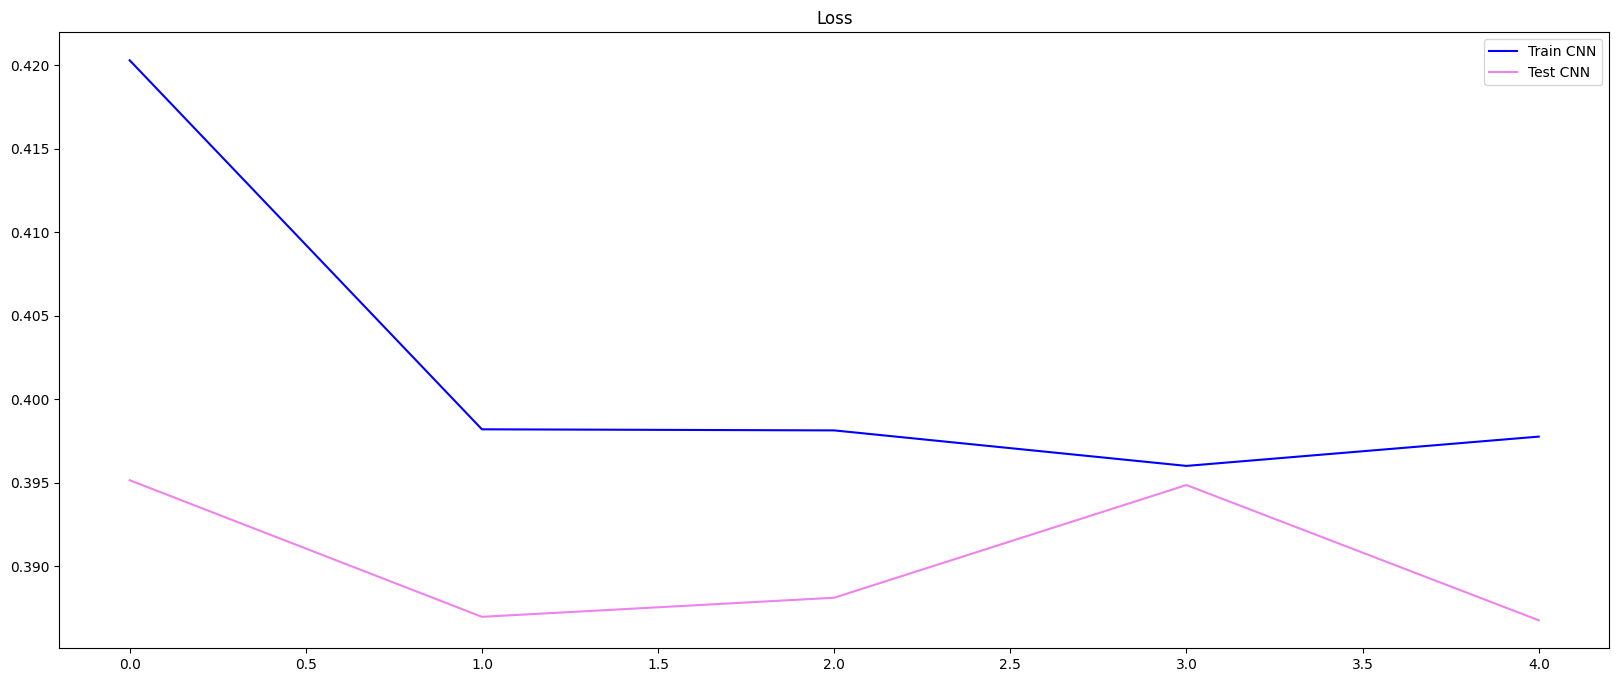

In [55]:
plt.figure(figsize=(20, 8))
plt.plot(cnn.history['loss'], color='blue', label='Train CNN')
plt.plot(cnn.history['val_loss'], color='violet', label='Test CNN')
plt.title('Loss')
plt.legend()
plt.show()

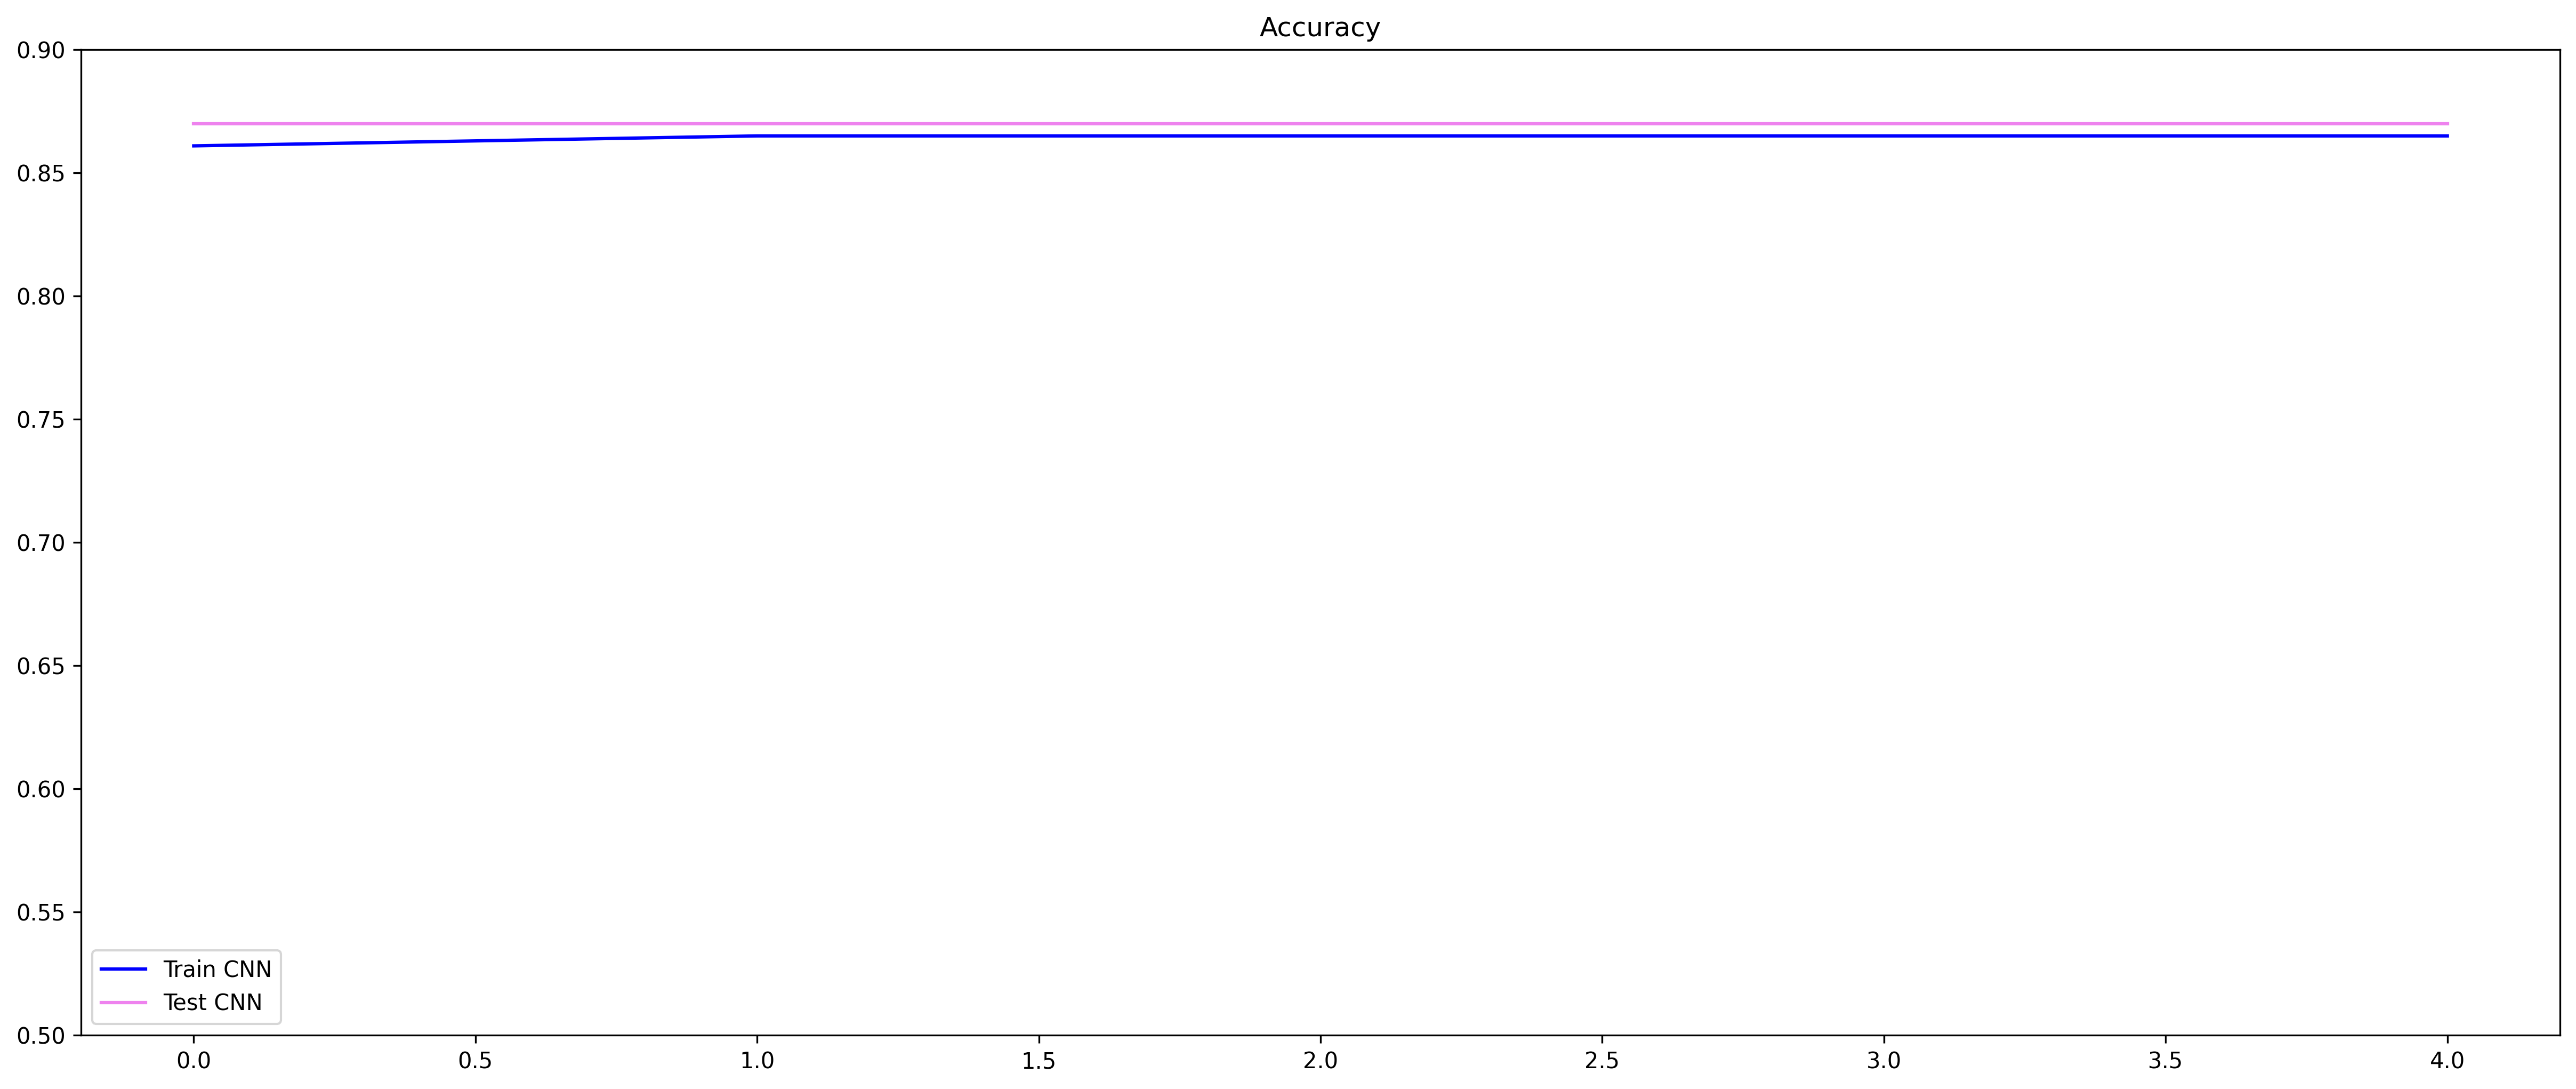

In [56]:


plt.figure(figsize=(20, 8), dpi = 300)
plt.plot(cnn.history['acc'], color='blue', label='Train CNN')
plt.plot(cnn.history['val_acc'], color='violet', label='Test CNN')
plt.title('Accuracy')
plt.ylim(0.50, 0.90)
plt.legend()
plt.show()